In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint
import scipy.stats as st
import os.path
from os import path
import json

#country count
output_file = os.path.join("output_data", "country_player_count.csv")

#player details 
output_data_player_details_CA = "output_data/player_details_CA.csv"
output_data_player_details_RU = "output_data/player_details_RU.csv"
output_data_player_details_MX = "output_data/player_details_MX.csv"
output_data_player_details_IE = "output_data/player_details_IE.csv"
output_data_player_details_NZ = "output_data/player_details_NZ.csv"
output_data_player_details_BR = "output_data/player_details_BR.csv"
output_data_player_details_DK = "output_data/player_details_DK.csv"

In [3]:
file = os.path.join("resources", "countries.csv")
countries_df = pd.read_csv(file)
countries_df.head()

country_name =[]
country_codes = []
player_count = []

for index, row in countries_df.iterrows():
    country_code = row["Code"]
    country = row["Country"]
    
    
    filepath = f'output_data/players_{country_code}.csv'
    
    if (path.exists(filepath)):
        players_df =  pd.read_csv(filepath)
              

    country_name.append(row["Country"])
    country_codes.append(row["Code"])
    player_count.append(len(players_df))

    
country_player_count_df = pd.DataFrame({"Country": country_name,
                                       "Country Code": country_codes,
                                        "Player Count": player_count})

count_sorted = country_player_count_df.sort_values("Player Count", ascending=False)
count_sorted_cleaned = count_sorted.loc[count_sorted["Player Count"] >= 1000]

count_sorted_cleaned = count_sorted_cleaned.reset_index(drop=True)
count_sorted_cleaned

,Country,Country Code,Player Count
0,British Indian Ocean Territory,IO,276922
1,India,IN,276922
2,United Kingdom of Great Britain and Northern I...,GB,192118
3,France,FR,176560
4,Brazil,BR,147040
...,...,...,...
117,Malta,MT,1397
118,Sudan,SD,1369
119,Nicaragua,NI,1317
120,Libya,LY,1180


In [4]:
count_sorted.to_csv(output_file, index=True, header=True)

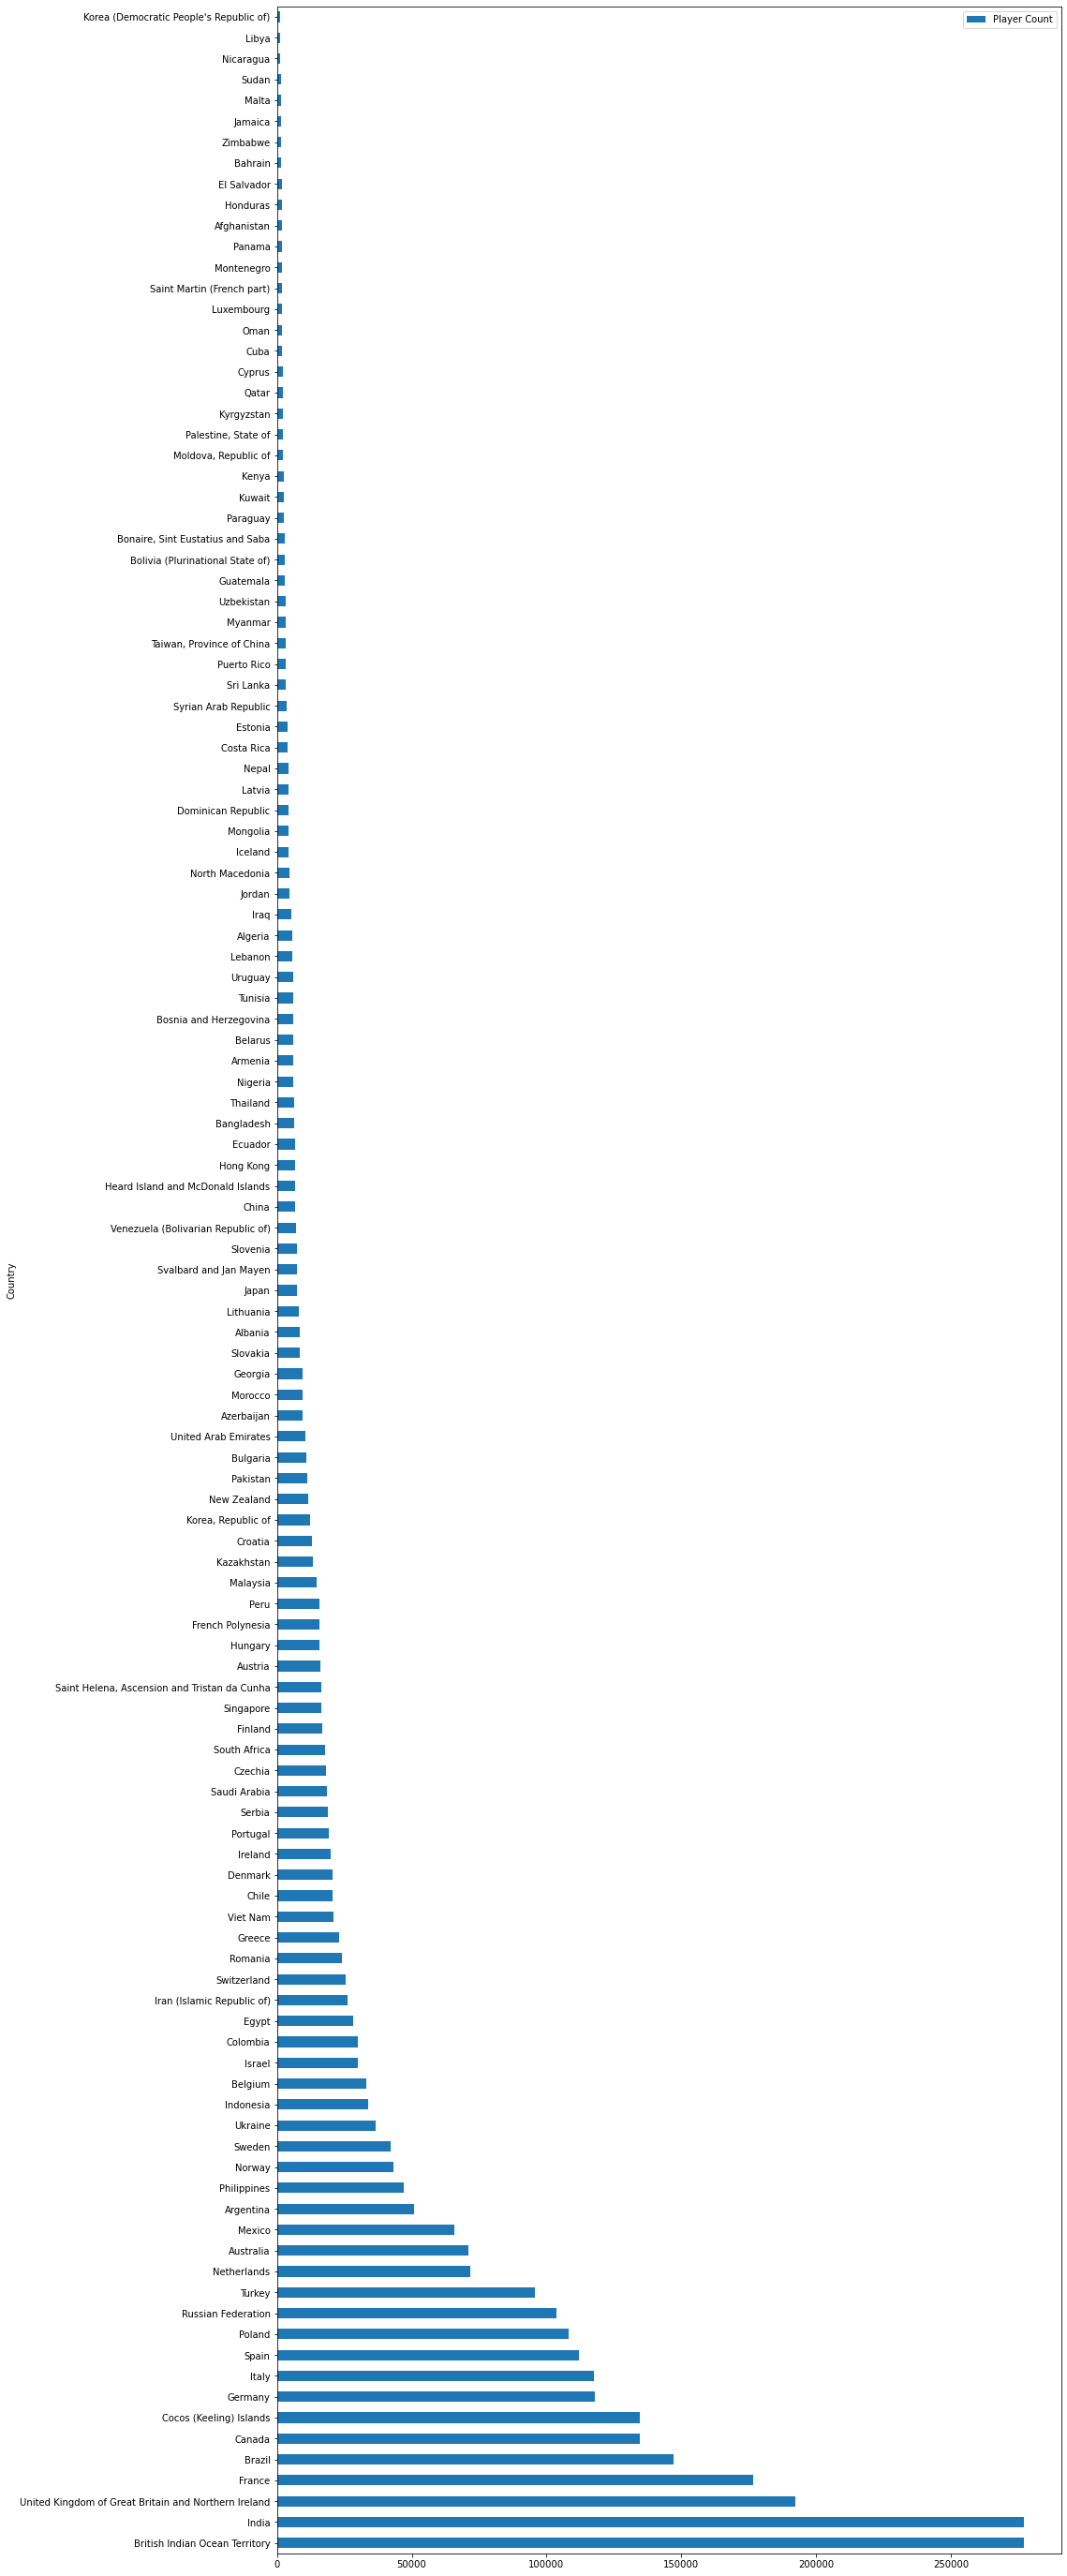

In [5]:
count_sorted_cleaned.plot.barh(x="Country", y="Player Count", rot=0, align='center', figsize=(15, 50))
plt.show()

In [ ]:
# get joined_yearmonth dataframe for player details file
def get_joined_yearmonth_dataframe(output_data_player_details):
    chessplayers_df = pd.read_csv(output_data_player_details)
    joined_dates = []
    joined_yearmonths = []
    joined_months = []
    for index, row in chessplayers_df.iterrows():        
        try:                  
            joined_date = time.strftime('%Y-%m-%d', time.localtime(row["joined"]))
            joined_month = time.strftime('%m', time.localtime(row["joined"]))
            joined_dates.append(joined_date)        
            joined_months.append(joined_month)        
        except: 
            print("unepxected error/skipping country")
    chessplayers_df["joined_date"] = joined_dates
    chessplayers_df["joined_month"] = joined_months
    chessplayers_df["joined_date"] = pd.to_datetime(chessplayers_df["joined_date"]).dt.strftime("%Y-%m-%d")
    chessplayers_df["joined_yearmonth"] = pd.to_datetime(chessplayers_df["joined_date"]).dt.strftime("%Y-%m")
    
    chessplayers_df.sort_values(by=["joined_yearmonth"])
    return chessplayers_df

In [ ]:
# CANADA
chessplayers_CA_df = get_joined_yearmonth_dataframe(output_data_player_details_CA)

# RUSSIA
chessplayers_RU_df = get_joined_yearmonth_dataframe(output_data_player_details_RU)

# MEXICO
chessplayers_MX_df = get_joined_yearmonth_dataframe(output_data_player_details_MX)

# IRELAND
chessplayers_IE_df = get_joined_yearmonth_dataframe(output_data_player_details_IE)

# NEW ZEALAND
chessplayers_NZ_df = get_joined_yearmonth_dataframe(output_data_player_details_NZ)

# BRAZIL
chessplayers_BR_df = get_joined_yearmonth_dataframe(output_data_player_details_BR)

# DENMARK
chessplayers_DK_df = get_joined_yearmonth_dataframe(output_data_player_details_DK)



In [ ]:
groupby_yearmonth_CA = chessplayers_CA_df.groupby(["joined_yearmonth"])
groupby_yearmonth_RU = chessplayers_RU_df.groupby(["joined_yearmonth"])
groupby_yearmonth_MX = chessplayers_MX_df.groupby(["joined_yearmonth"])


groupby_yearmonth_BR = chessplayers_BR_df.groupby(["joined_yearmonth"])
groupby_yearmonth_DK = chessplayers_DK_df.groupby(["joined_yearmonth"])

In [8]:
groupby_yearmonth_CA_count_df = groupby_yearmonth_CA["joined_yearmonth"].count()
groupby_yearmonth_RU_count_df = groupby_yearmonth_RU["joined_yearmonth"].count()
groupby_yearmonth_MX_count_df = groupby_yearmonth_MX["joined_yearmonth"].count()


groupby_yearmonth_BR_count_df = groupby_yearmonth_BR["joined_yearmonth"].count()
groupby_yearmonth_DK_count_DK = groupby_yearmonth_DK["joined_yearmonth"].count()

In [12]:
CA_test_df=groupby_yearmonth_CA_count_df
CA_test_df.tail()


joined_yearmonth
2020-09      56
2020-10     134
2020-11     623
2020-12    1023
2021-01     621
Name: joined_yearmonth, dtype: int64

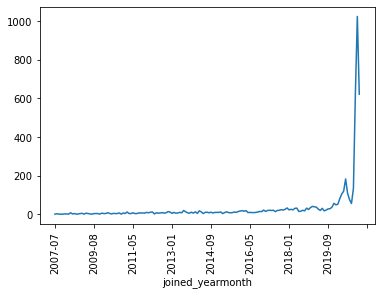

In [10]:
groupby_yearmonth_CA_count_df.plot()

plt.xticks(rotation=90)
plt.show()

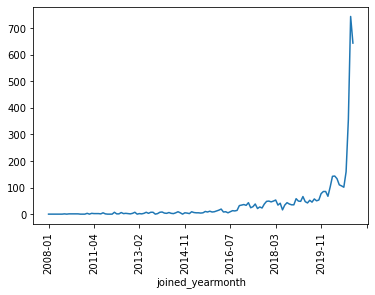

In [29]:
groupby_yearmonth_RU_count_df.plot()

plt.xticks(rotation=90)
plt.show()

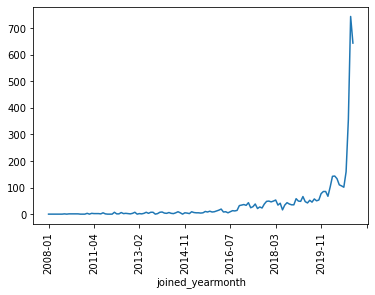

In [43]:
groupby_yearmonth_MX_count_df.plot()

startdate2019 = pd.Timestamp(date.today().year-2, 1, 1)
enddate2019 = pd.Timestamp(date.today().year-1, 1, 1)

In [9]:
chessplayers_CA_df["joined_date"] = pd.to_datetime(chessplayers_CA_df["joined_date"])

chessplayers_2020_CA_df = chessplayers_CA_df.loc[(chessplayers_CA_df["joined_date"] >= startdate2020) & (chessplayers_CA_df["joined_date"] < enddate2020)]
chessplayers_2020_CA_df

chessplayers_2019_CA_df = chessplayers_CA_df.loc[(chessplayers_CA_df["joined_date"] >= startdate2019) & (chessplayers_CA_df["joined_date"] < enddate2019)]
chessplayers_2019_CA_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
5,5,61337250,uchihasasuke777,NaN,1,CA,NaN,1610308974,1558627376,basic,False,2019-05-23,05,2019-05
26,26,58656772,samiam63636,NaN,0,CA,NaN,1610305741,1552869629,basic,False,2019-03-17,03,2019-03
51,51,61598732,amazingtacothefirst,NaN,2,CA,NaN,1610308444,1559178972,basic,False,2019-05-29,05,2019-05
69,69,57694180,killaseason27,NaN,13,CA,NaN,1610316107,1550878632,basic,False,2019-02-22,02,2019-02
77,77,68807588,theob24,NaN,2,CA,NaN,1610301393,1575390100,basic,False,2019-12-03,12,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,4928,56449102,ugotugot,NaN,0,CA,NaN,1610319545,1548308489,premium,False,2019-01-23,01,2019-01
4935,4935,57081784,patron884,NaN,6,CA,NaN,1610311160,1549590464,basic,False,2019-02-07,02,2019-02
4946,4946,67943794,sirsheepadoodle,NaN,0,CA,NaN,1610255836,1573677350,basic,False,2019-11-13,11,2019-11
4956,4956,65079064,baconbitz80,NaN,8,CA,NaN,1610316886,1567565326,basic,False,2019-09-03,09,2019-09


In [10]:
chessplayers_RU_df["joined_date"] = pd.to_datetime(chessplayers_RU_df["joined_date"])

chessplayers_2020_RU_df = chessplayers_RU_df.loc[(chessplayers_RU_df["joined_date"] >= startdate2020) & (chessplayers_RU_df["joined_date"] < enddate2020)]
chessplayers_2020_RU_df

chessplayers_2019_RU_df = chessplayers_RU_df.loc[(chessplayers_RU_df["joined_date"] >= startdate2019) & (chessplayers_RU_df["joined_date"] < enddate2019)]
chessplayers_2019_RU_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
4,4,68733458,boltina,NaN,4,RU,NaN,1610282346,1575239619,premium,False,2019-12-01,12,2019-12
18,18,56534276,karelinaksu,NaN,3,RU,NaN,1610142422,1548466501,basic,False,2019-01-25,01,2019-01
30,30,59223840,mareemaroon,NaN,0,RU,NaN,1610301405,1554025304,basic,False,2019-03-31,03,2019-03
52,52,69771496,wpion7,NaN,1,RU,NaN,1610377072,1577165556,basic,False,2019-12-23,12,2019-12
62,62,58863954,lenapush,NaN,1,RU,NaN,1610368869,1553282440,basic,False,2019-03-22,03,2019-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,4964,69503348,viktor1741,NaN,0,RU,NaN,1610291025,1576653170,basic,False,2019-12-17,12,2019-12
4969,4969,67415404,brykalovroman,NaN,8,RU,NaN,1610297585,1572634746,basic,False,2019-11-01,11,2019-11
4975,4975,66941314,renat9999,NaN,11,RU,NaN,1610393406,1571652315,basic,False,2019-10-21,10,2019-10
4982,4982,61187578,djonnyfon,NaN,19,RU,Белгород,1610386967,1558296404,basic,False,2019-05-19,05,2019-05


In [11]:
groupby_yearmonth_2020_CA = chessplayers_2020_CA_df.groupby(["joined_month"])
groupby_yearmonth_2019_CA = chessplayers_2019_CA_df.groupby(["joined_month"])

groupby_yearmonth_2020_RU = chessplayers_2020_RU_df.groupby(["joined_month"])
groupby_yearmonth_2019_RU = chessplayers_2019_RU_df.groupby(["joined_month"])



In [12]:
groupby_yearmonth_2020_CA_count_df = groupby_yearmonth_2020_CA["joined_month"].count()
groupby_yearmonth_2019_CA_count_df = groupby_yearmonth_2019_CA["joined_month"].count()

groupby_yearmonth_2020_RU_count_df = groupby_yearmonth_2020_RU["joined_month"].count()
groupby_yearmonth_2019_RU_count_df = groupby_yearmonth_2019_RU["joined_month"].count()

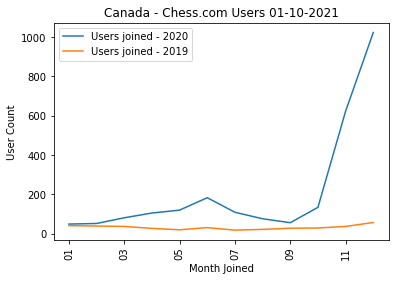

In [13]:
groupby_yearmonth_2020_CA_count_df.plot()
groupby_yearmonth_2019_CA_count_df.plot()

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

file_created_datetime_CA = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_CA)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Canada - Chess.com Users {file_created_datetime_CA}")
plt.legend(['Users joined - 2020', 'Users joined - 2019'])
plt.show()



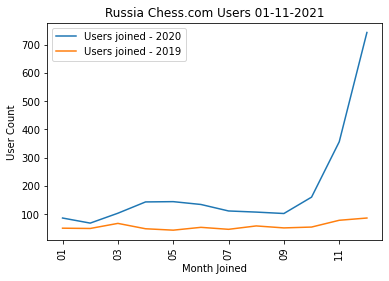

In [15]:
groupby_yearmonth_2020_RU_count_df.plot()
groupby_yearmonth_2019_RU_count_df.plot()

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

file_created_datetime_RU = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_RU)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Russia Chess.com Users {file_created_datetime_RU}")
plt.legend(['Users joined - 2020', 'Users joined - 2019'])
plt.show()



In [ ]:
groupby_yearmonth_CA = chessplayers_CA_df.groupby(["joined_yearmonth"])
groupby_yearmonth_RU = chessplayers_RU_df.groupby(["joined_yearmonth"])
groupby_yearmonth_MX = chessplayers_RU_df.groupby(["joined_yearmonth"])


In [ ]:
groupby_yearmonth_CA_count_df = groupby_yearmonth_CA["joined_yearmonth"].count()
groupby_yearmonth_RU_count_df = groupby_yearmonth_RU["joined_yearmonth"].count()
groupby_yearmonth_MX_count_df = groupby_yearmonth_RU["joined_yearmonth"].count()

In [ ]:
groupby_yearmonth_CA_count_df.plot()

plt.xticks(rotation=90)
plt.show()

In [ ]:
groupby_yearmonth_RU_count_df.plot()

plt.xticks(rotation=90)
plt.show()

In [ ]:
groupby_yearmonth_MX_count_df.plot()

plt.xticks(rotation=90)
plt.show()

In [ ]:
groupby_yearmonth_CA_count_df.sort_values(ascending=False)

In [ ]:
groupby_yearmonth_RU_count_df.sort_values(ascending=False)

In [ ]:
groupby_yearmonth_MX_count_df.sort_values(ascending=False)

In [ ]:
chessplayers_location_RU_df = chessplayers_RU_df.loc[chessplayers_RU_df["location"].notnull() == True]
chessplayers_location_CA_df = chessplayers_CA_df.loc[chessplayers_CA_df["location"].notnull() == True]
chessplayers_location_MX_df = chessplayers_MX_df.loc[chessplayers_MX_df["location"].notnull() == True]

In [ ]:
chessplayers_location_RU_df

In [ ]:
chessplayers_location_CA_df

In [ ]:
chessplayers_location_MX_df